In [ ]:
cd /content/drive/MyDrive/Master/CS2310.CH190/Lab2/Image-Classification-CIFAR100

/content/drive/MyDrive/Master/CS2310.CH190/Lab2/Image-Classification-CIFAR100


In [ ]:
!pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement transformer (from versions: none)
ERROR: No matching distribution found for transformer


In [ ]:
!pip install "transformers[torch]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvji

In [ ]:
!pip install torch-optimizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 5.2 MB/s eta 0:00:00


In [ ]:
!python main.py --option 6

2025-05-29 10:19:18.094766: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-29 10:19:18.110138: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748513958.128098    1763 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748513958.133399    1763 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-29 10:19:18.150994: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
import re
import matplotlib.pyplot as plt

def show_train_val_accuracy_plot_from_file(filepath):
    with open(filepath, 'r') as f:
        log_text = f.read()

    # Trích xuất Training Accuracy (từ dòng Epoch ...)
    train_acc = [float(x) for x in re.findall(r"\[ConvNeXtTiny\] Epoch \d+: Loss=[\d\.]+, Accuracy=(\d+\.\d+)%", log_text)]

    # Trích xuất Evaluation Accuracy (từ dòng Evaluation after Epoch ...)
    val_acc = [float(x) for x in re.findall(r"\[ConvNeXtTiny\] Evaluation after Epoch \d+: Loss=[\d\.]+, Accuracy=(\d+\.\d+)%", log_text)]

    # Trích xuất số epoch bắt đầu (ví dụ: Epoch 86)
    start_epoch = int(re.search(r"\[ConvNeXtTiny\] Epoch (\d+):", log_text).group(1))
    epochs = list(range(start_epoch, start_epoch + len(train_acc)))

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_acc, marker='o', label='Train Accuracy')
    plt.plot(epochs, val_acc, marker='s', label='Validation Accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("Train and Validation Accuracy per Epoch")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

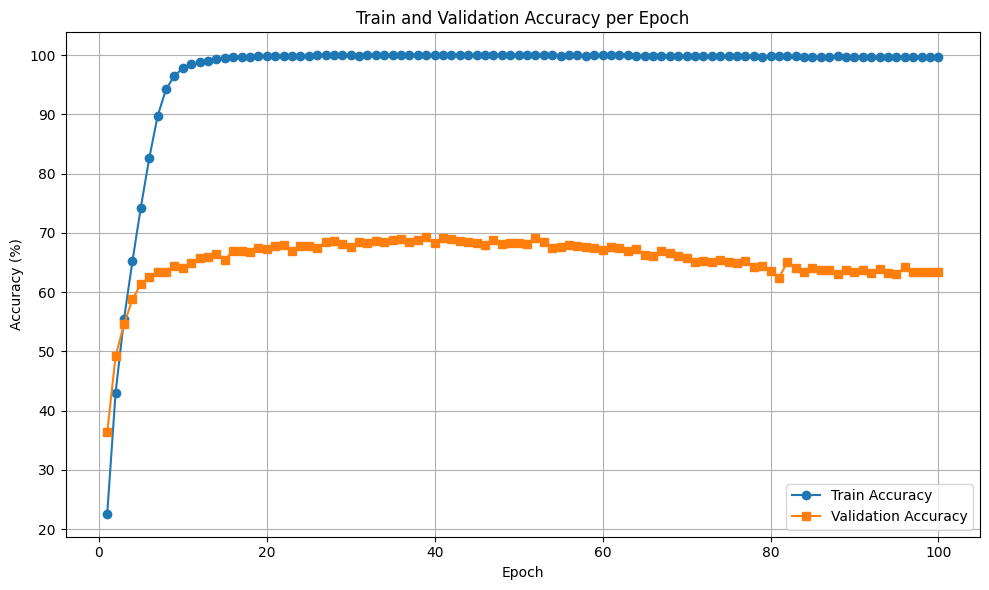

In [4]:
show_train_val_accuracy_plot_from_file("/content/drive/MyDrive/Master/CS2310.CH190/Lab2/Image-Classification-CIFAR100/training_logs/Lab2_Train_ConvNeXt.txt")